In [2]:
def clear_output():
    """
    clear output for both jupyter notebook and the console
    """
    import os
    os.system('cls' if os.name == 'nt' else 'clear')
    clear()


A


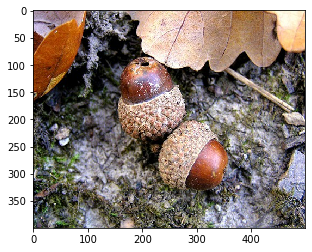

In [11]:
plt.imshow(slides[0].image)

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output as clear
from ipywidgets import IntProgress
from IPython.display import display
import Slide as s

slides=[]
p_bar = IntProgress(max=900)
p_bar.value = 0
p_bar.description = 'loading'

with open('data/image_info.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        s_name = row[1].strip()
        s_image = mpimg.imread('data/ImageDataset/{image_name}.jpg'.format(image_name = s_name))
        s_valence = row[4]
        s_arousal = row[5]
        s_intensity = row[6]
        s_dominant_color = np.array(row[7:10])
        slides.append(s.Slide(s_name,
                                  s_image,
                                  s_valence,s_arousal,s_intensity,s_dominant_color))
        p_bar.value += 1
        display(p_bar)


NameError: name 'p2' is not defined

In [8]:
from ipywidgets import IntProgress
from IPython.display import display
p2 = IntProgress(max=100)
p2.value += 10
p2.description = 'Running'
display(p2)

IntProgress(value=10, description='Running')